<a href="https://colab.research.google.com/github/Nurlyssultan/ML-DS-Cheat-Sheet/blob/main/Practical%20Statistics%20with%20Python/Multilinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Statistics with Python/Regression Analysis/Multilinear Regression

[Errno 2] No such file or directory: '/content/drive/MyDrive/Statistics with Python/Regression Analysis/Multilinear Regression'
/content


In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [6]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# load the data
df = pd.read_csv("/content/drive/MyDrive/Statistics with Python 2/Regression Analysis/Multilinear Regression/diamond.csv")
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


In [9]:
# DF information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     308 non-null    int64  
 1   carat          308 non-null    float64
 2   colour         308 non-null    object 
 3   clarity        308 non-null    object 
 4   certification  308 non-null    object 
 5   price          308 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 14.6+ KB


# Exploratory Data Analysis

In [10]:
# Correlation
df[['carat', 'price']].corr()

,carat,price
carat,1.000000,0.944727
price,0.944727,1.000000


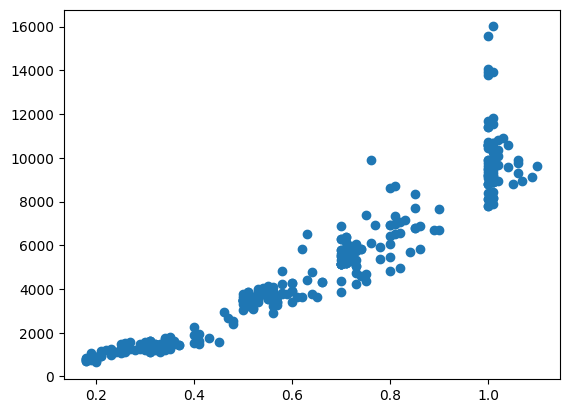

In [11]:
X = df.carat
y = df.price

plt.scatter(X,y)
plt.show()

In [12]:
# isolate X and Y
y = df.price
X = df.carat

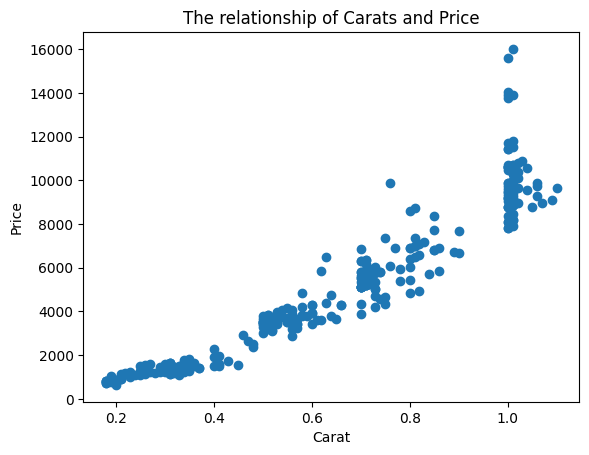

In [13]:
# Scatter plot
plt.scatter(X, y)

#Customizing the graph
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("The relationship of Carats and Price")

plt.show()

# Linear Regression with Stat

In [14]:
# Adding a constant
X = sm.add_constant(X)
X.head(2)

,const,carat
0,1.0,0.3
1,1.0,0.3


In [15]:
# Equation : y = a + b*X + e
model1 = sm.OLS(endog = y, exog = X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          3.04e-150
Time:                        10:39:34   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

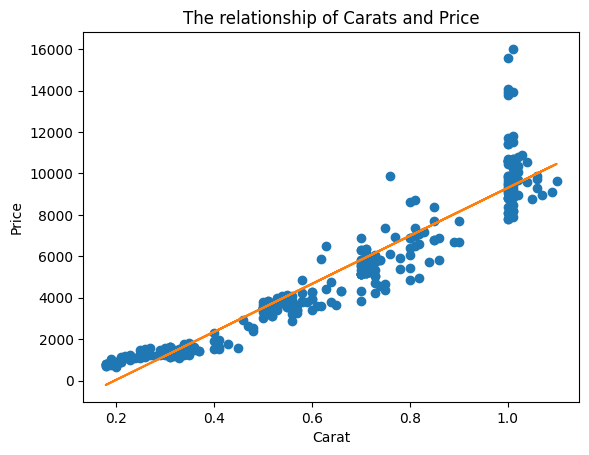

In [16]:
X = df.carat
y = df.price
plt.plot(X,y,'o')
b,a = np.polyfit(X,y,1)
plt.plot(X,b*X+a)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("The relationship of Carats and Price")
plt.show()

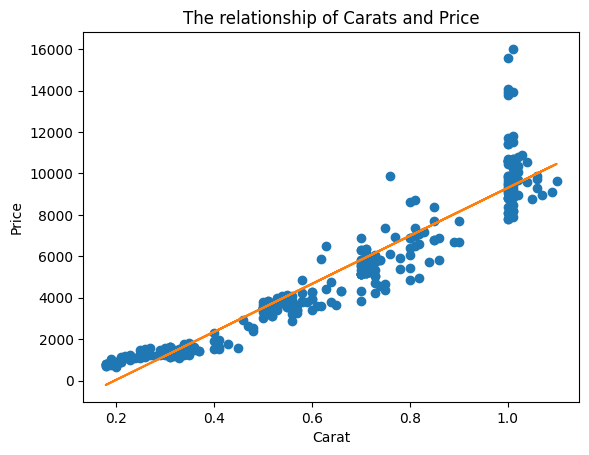

In [17]:
# Plotting the regression curve
X = df.carat

# Plotting the Curve and dots
plt.plot(X, y, 'o')
b, a = np.polyfit(X, y, 1)
plt.plot(X, b * X + a)

#Customizing the graph
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("The relationship of Carats and Price")

plt.show()

# Linear Regression with Dummy Variables

In [18]:
# Look at the carat variable
df.carat.describe()

,carat
count,308.000000
mean,0.630909
std,0.277183
min,0.180000
25%,0.350000
50%,0.620000
75%,0.850000
max,1.100000


In [19]:
# Create a dummy variable with carat
X_binary = np.where(df.carat > 0.6, 1, 0)
X_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:
# Add a constant
X_binary_const = sm.add_constant(X_binary)

In [21]:
# Build the second regression model
model2 = sm.OLS(y, X_binary_const).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           1.79e-73
Time:                        10:40:07   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2225.2303    161.442     13.783      0.0

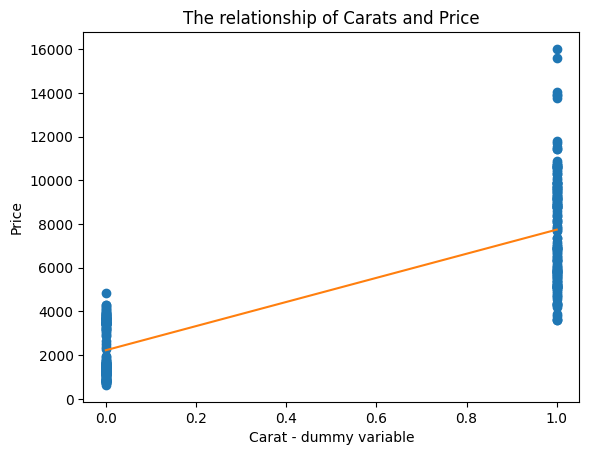

In [22]:
# Plotting the Curve and dots
plt.plot(X_binary, y, 'o')
b, a = np.polyfit(X_binary, y, 1)
plt.plot(X_binary, b * X_binary + a)

#Customizing the graph
plt.xlabel("Carat - dummy variable")
plt.ylabel("Price")
plt.title("The relationship of Carats and Price")

plt.show()

# Categorical variables

In [23]:
# Data
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


In [24]:
# count the number of values per unique option
df['colour'].value_counts()

,count
colour,
F,82
G,65
H,61
E,44
I,40
D,16


In [25]:
# Loop through the categoricala variables to count unique options
for cat in list(df.select_dtypes(include = 'object')):
  print(df[cat].value_counts())

colour
F    82
G    65
H    61
E    44
I    40
D    16
Name: count, dtype: int64
clarity
VS1     81
VVS2    78
VS2     53
VVS1    52
IF      44
Name: count, dtype: int64
certification
GIA    151
HRD     79
IGI     78
Name: count, dtype: int64


In [26]:
# Transform categorical variables into dummy variables
df = pd.get_dummies(data = df, drop_first = True)
df

,Unnamed: 0,carat,price,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
0,1,0.30,1302,False,False,False,False,False,False,True,False,False,False,False
1,2,0.30,1510,True,False,False,False,False,True,False,False,False,False,False
2,3,0.30,1510,False,False,True,False,False,False,False,True,False,False,False
3,4,0.30,1260,False,False,True,False,False,True,False,False,False,False,False
4,5,0.31,1641,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,304,1.01,8175,False,False,False,False,True,True,False,False,False,True,False
304,305,1.02,10796,False,True,False,False,False,False,False,False,True,True,False
305,306,1.06,9890,False,False,False,True,False,False,False,False,True,True,False
306,307,1.02,8959,False,False,False,True,False,False,True,False,False,True,False


# Multilinear Regression with Stat

In [28]:
#Data
df.head()

,Unnamed: 0,carat,price,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
0,1,0.30,1302,False,False,False,False,False,False,True,False,False,False,False
1,2,0.30,1510,True,False,False,False,False,True,False,False,False,False,False
2,3,0.30,1510,False,False,True,False,False,False,False,True,False,False,False
3,4,0.30,1260,False,False,True,False,False,True,False,False,False,False,False
4,5,0.31,1641,False,False,False,False,False,True,False,False,False,False,False


In [29]:
# isolate X and y
y = df.price
X = df.drop(columns = ["price", "Unnamed: 0"])
X.head()

,carat,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
0,0.30,False,False,False,False,False,False,True,False,False,False,False
1,0.30,True,False,False,False,False,True,False,False,False,False,False
2,0.30,False,False,True,False,False,False,False,True,False,False,False
3,0.30,False,False,True,False,False,True,False,False,False,False,False
4,0.31,False,False,False,False,False,True,False,False,False,False,False


In [30]:
# Add a constant to X
X = sm.add_constant(X)

In [31]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 1502)

In [32]:
# Multilinear regression
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Fill any missing values created by conversion with the mean
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())

X_train = X_train.astype(float)
y_train = y_train.astype(float)

model3 = sm.OLS(y_train, X_train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     484.6
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          2.89e-157
Time:                        10:41:35   Log-Likelihood:                -1945.6
No. Observations:                 246   AIC:                             3917.
Df Residuals:                     233   BIC:                             3963.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               251.7901    297.74

# Accuracy Assessment

In [34]:
# Predict with the regression model
predictions = model3.predict(X_test)

In [35]:
# MEasure the accuracy # RMSE, RSME
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f"MAE: {mean_absolute_error(y_test, predictions):.0f}")
print(f"RMSE: {mean_squared_error(y_test, predictions, squared = False):.0f}")

MAE: 522
RMSE: 846


# Simple Linear Regression Sklearn

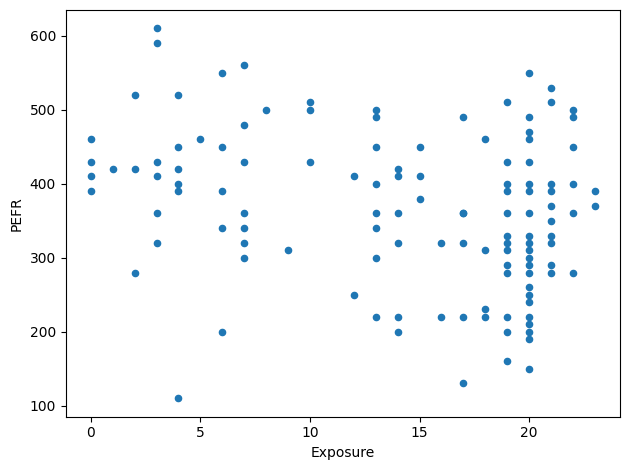

In [36]:
lung = pd.read_csv('/content/drive/MyDrive/practical-statistics-for-data-scientists-master/data/LungDisease.csv')

lung.plot.scatter(x='Exposure', y='PEFR')

plt.tight_layout()
plt.show()

In [37]:
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


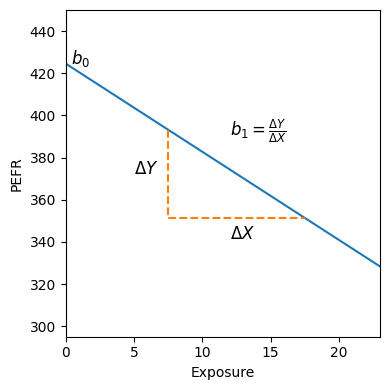

In [39]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 23)
ax.set_ylim(295, 450)
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')
ax.plot((0, 23), model.predict(pd.DataFrame({'Exposure': [0, 23]})))
ax.text(0.4, model.intercept_, r'$b_0$', size='larger')

x = pd.DataFrame({'Exposure': [7.5,17.5]})
y = model.predict(x)
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
ax.text(5, np.mean(y), r'$\Delta Y$', size='larger')
ax.text(12, y[1] - 10, r'$\Delta X$', size='larger')
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')

plt.tight_layout()
plt.show()

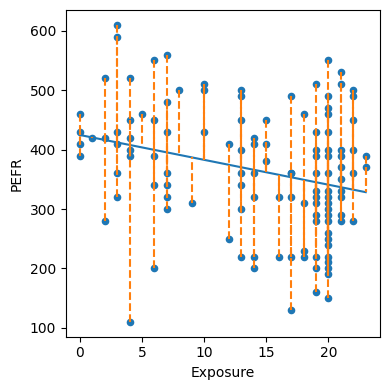

In [40]:
fitted = model.predict(lung[predictors])
residuals = lung[outcome] - fitted

ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(4, 4))
ax.plot(lung.Exposure, fitted)
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted):
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

# Multi Linear Regression Sklearn

In [42]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms',
          'Bedrooms', 'BldgGrade']

house = pd.read_csv('/content/drive/MyDrive/practical-statistics-for-data-scientists-master/data/house_sales.csv', sep='\t')
print(house[subset].head())

   AdjSalePrice  SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade
1      300805.0           2400     9373       3.00         6          7
2     1076162.0           3764    20156       3.75         4         10
3      761805.0           2060    26036       1.75         4          8
4      442065.0           3200     8618       3.75         5          7
5      297065.0           1720     8620       1.75         4          7


In [43]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240793
 SqFtLot: -0.06046682065307607
 Bathrooms: -19442.840398321066
 Bedrooms: -47769.95518521438
 BldgGrade: 106106.96307898081


In [44]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


In [45]:
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:53:00   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694

In [46]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated',
              'NewConstruction']

X = pd.get_dummies(house[predictors], drop_first=True, dtype=int)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:53:54   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

# Model Selection and Stepwise Regression

In [48]:
pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 1.8 MB/s eta 0:00:00


In [49]:
from dmba import stepwise_selection
from dmba import AIC_score

y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model,
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Colab environment detected.
Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None

Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.2775530420188
 BldgGrade: 137159.56022619782
 YrBuilt: -3565.4249392492984
 Bedrooms: -51947.38367361323
 Bathrooms: 42396.16452771774
 PropertyType_Townhouse: 84479.16203300416
 SqFtFinBasement: 7.046974967553979
 PropertyType_Single Family: 22912.055187017646


# Lasso


In [50]:
from sklearn.linear_model import Lasso, LassoLars, LassoCV, LassoLarsCV
from sklearn.preprocessing import StandardScaler

In [51]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated',
              'NewConstruction']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]
columns = X.columns
# X = StandardScaler().fit_transform(X * 1.0)
y = house[outcome]

house_lm = LinearRegression()
print(house_lm.fit(X, y))

LinearRegression()


In [52]:
house_lasso = Lasso(alpha=10)
print(house_lasso.fit(X, y))

Lasso(alpha=10)


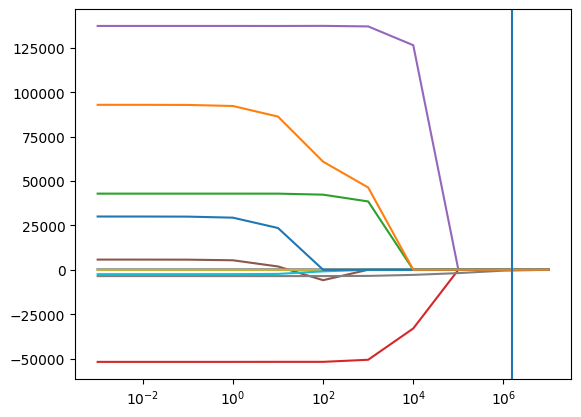

In [53]:
Method = LassoLars
MethodCV = LassoLarsCV
Method = Lasso
MethodCV = LassoCV

alpha_values = []
results = []
for alpha in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    model = Method(alpha=alpha)
    model.fit(X, y)
    alpha_values.append(alpha)
    results.append(model.coef_)
modelCV = MethodCV(cv=5)
modelCV.fit(X, y)
ax = pd.DataFrame(results, index=alpha_values, columns=columns).plot(logx=True, legend=False)
ax.axvline(modelCV.alpha_)
plt.show()

In [54]:
pd.DataFrame({
    'name': columns,
    'coef': modelCV.coef_,
})

,name,coef
0,SqFtTotLiving,289.048846
1,SqFtLot,0.029471
2,Bathrooms,0.000000
3,Bedrooms,-0.000000
4,BldgGrade,0.000000
5,NbrLivingUnits,-0.000000
6,SqFtFinBasement,3.316479
7,YrBuilt,-0.000000
8,YrRenovated,45.727472
9,NewConstruction,-0.000000
